# Packages installations

In [1]:
install.packages('zoo')
install.packages('dplyr')
install.packages('corrgram')
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


# Libraries loading

In [2]:
library(zoo)
library(dplyr)
library(corrgram)
library(ggplot2)


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


# Data loading

In [3]:
herrings_raw_top <- read.csv(file='https://raw.githubusercontent.com/mateuszskiba/emd-1/master/sledzie.csv?token=AFU5A4AIIMA5QAADFMACAFS55ZYIY', header=TRUE, sep=',', na.strings='?', nrows=100)
classes <- sapply(herrings_raw_top, class)
herrings_raw <- read.csv(file='https://raw.githubusercontent.com/mateuszskiba/emd-1/master/sledzie.csv?token=AFU5A4AIIMA5QAADFMACAFS55ZYIY', header=TRUE, sep=',', na.strings='?', colClasses=classes)
herrings <- 
  herrings_raw %>%
  do(na.locf(.))

head(herrings)

,X,length,cfin1,cfin2,chel1,chel2,lcop1,lcop2,fbar,recr,cumf,totaln,sst,sal,xmonth,nao
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2,1,22.5,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
3,2,25.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
4,3,25.5,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
5,4,24.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
6,5,22.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
7,6,24.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8


# Summary

In [6]:
dim(herrings)

[1] 52581    16

In [7]:
summary(herrings)

       X             length         cfin1             cfin2        
 Min.   :    1   Min.   :19.0   Min.   : 0.0000   Min.   : 0.0000  
 1st Qu.:13146   1st Qu.:24.0   1st Qu.: 0.0000   1st Qu.: 0.2778  
 Median :26291   Median :25.5   Median : 0.1111   Median : 0.7012  
 Mean   :26291   Mean   :25.3   Mean   : 0.4463   Mean   : 2.0255  
 3rd Qu.:39436   3rd Qu.:26.5   3rd Qu.: 0.3333   3rd Qu.: 1.7936  
 Max.   :52581   Max.   :32.5   Max.   :37.6667   Max.   :19.3958  
     chel1            chel2            lcop1              lcop2       
 Min.   : 0.000   Min.   : 5.238   Min.   :  0.3074   Min.   : 7.849  
 1st Qu.: 2.469   1st Qu.:13.427   1st Qu.:  2.5479   1st Qu.:17.808  
 Median : 5.750   Median :21.435   Median :  7.0000   Median :24.859  
 Mean   :10.004   Mean   :21.218   Mean   : 12.8029   Mean   :28.423  
 3rd Qu.:11.500   3rd Qu.:27.193   3rd Qu.: 21.2315   3rd Qu.:37.232  
 Max.   :75.000   Max.   :57.706   Max.   :115.5833   Max.   :68.736  
      fbar             recr

In [17]:
herrings_grouped <- herrings %>%
  group_by(length) %>%
  summarise_all(list(mean))
herrings_grouped

length,X,cfin1,cfin2,chel1,chel2,lcop1,lcop2,fbar,recr,cumf,totaln,sst,sal,xmonth,nao
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19.0,44546.00,0.37333000,0.3756600,13.415810,33.80667,14.430735,38.40446,0.3015000,355929.0,0.2738773,332365.0,14.49940,35.50419,10.500000,2.08000000
19.5,40581.57,0.12396286,1.3234714,4.033914,26.71374,4.355770,34.77980,0.2412857,771498.6,0.2098519,433470.8,14.46293,35.53724,8.285714,2.19571429
20.0,27251.33,0.15055407,1.1128730,4.616689,23.96920,5.295779,30.16245,0.2902963,519172.5,0.2462085,351979.9,14.37254,35.52550,6.481481,2.12111111
20.5,21674.86,0.05168273,1.3303259,4.605041,23.88894,5.596295,29.81668,0.2945455,490498.6,0.2734369,307218.8,14.32978,35.51245,7.068182,1.76534091
21.0,23341.54,0.09611318,0.7846350,4.847758,23.68124,5.739180,28.88207,0.2983227,479008.9,0.2677146,336529.7,14.32959,35.50275,7.090909,1.64950000
21.5,31210.29,0.09421594,0.8894966,6.011822,24.74293,7.230180,29.84346,0.2981860,462642.2,0.2656650,345971.0,14.30459,35.50019,7.093023,1.21729387
22.0,35143.11,0.09839507,0.9602806,6.370323,25.65475,7.788024,30.51671,0.2664446,470033.7,0.2514679,358418.4,14.31438,35.49839,7.191808,0.95419580
22.2,21826.50,0.00000000,0.7011800,11.500000,5.67765,23.000000,9.17171,0.2270000,421391.0,0.1480941,730351.2,13.63160,35.50835,5.000000,-2.86000000
22.3,21716.00,0.00000000,0.7011800,11.500000,5.67765,23.000000,9.17171,0.2270000,421391.0,0.1480941,730351.2,13.63160,35.50835,5.000000,-2.86000000


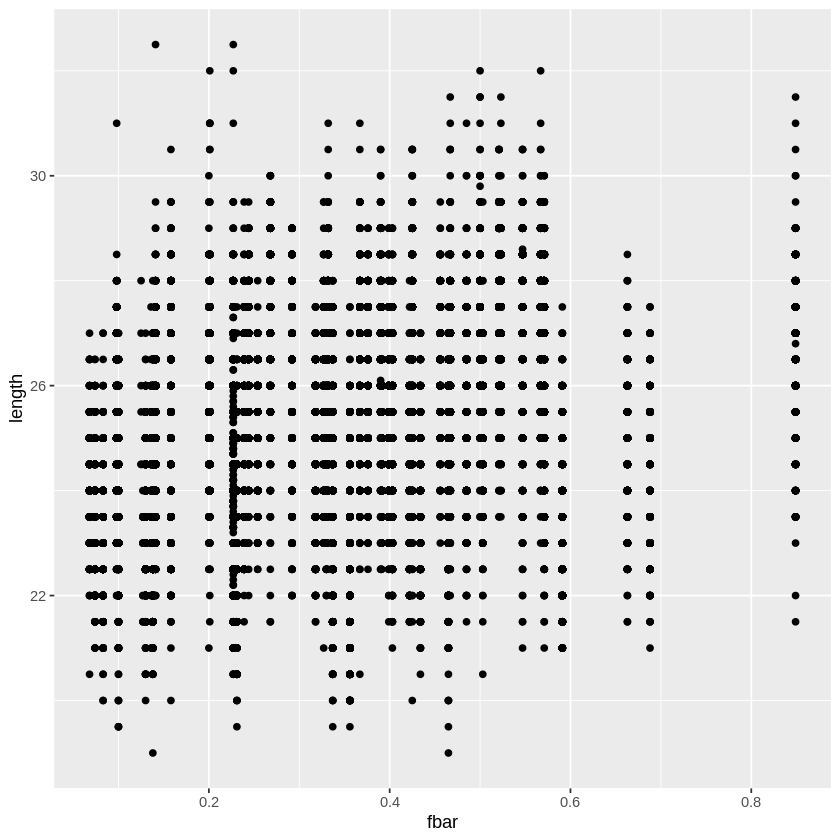

In [10]:
ggplot(
  herrings,
  aes(x=fbar,
      y=length
  )
) +
geom_point()

# Correlations

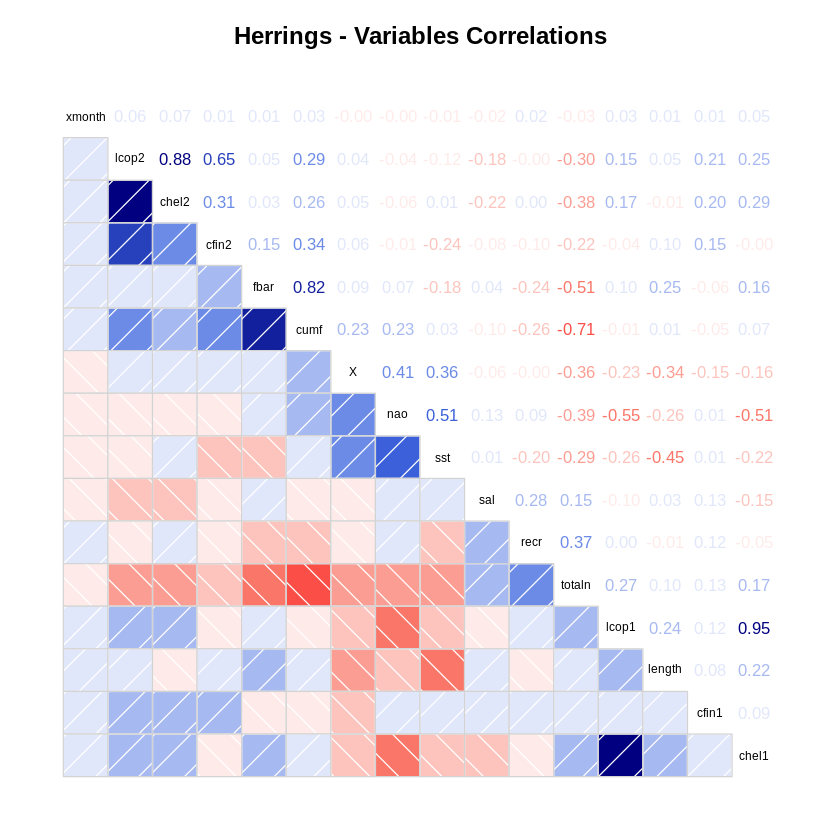

In [4]:
# red - reverse correation

corrgram(herrings, order=TRUE, lower.panel=panel.shade,
  upper.panel=panel.cor, text.panel=panel.txt,
  main="Herrings - Variables Correlations")

# Interactive graph